In [1]:
url = "https://raw.githubusercontent.com/Gunnvant/corp_trainings/main/ola_electric/predictive_modelling/data/dm.csv"
import pandas as pd

In [2]:
data = pd.read_csv(url)

In [3]:
data.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127


- Variable Profiling
- Data prep
- Model

In [4]:
data.groupby('Age')['AmountSpent'].mean()

Age
Middle    1501.690945
Old       1432.126829
Young      558.623693
Name: AmountSpent, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='Age'>

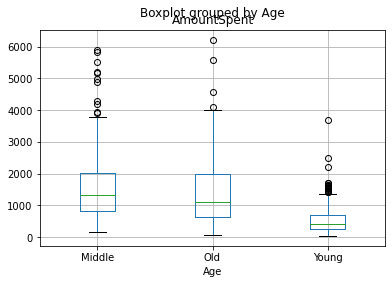

In [6]:
data.boxplot(by="Age",column='AmountSpent')

In [7]:
def combine_age(x):
    if x=="Middle" or x=="Old":
        res = "Middle-Old"
    else:
        res = x
    return res

In [9]:
data['Age_N']=data['Age'].map(combine_age)

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='Gender'>

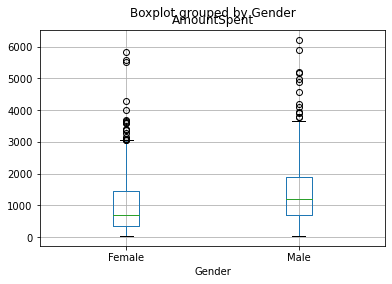

In [10]:
data.boxplot(by="Gender",column='AmountSpent')

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='OwnHome'>

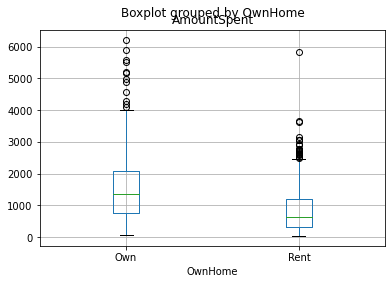

In [11]:
data.boxplot(by="OwnHome",column='AmountSpent')

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='Married'>

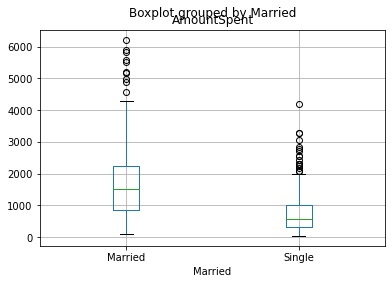

In [12]:
data.boxplot(by="Married",column='AmountSpent')

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='Location'>

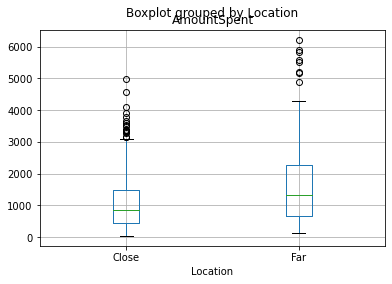

In [14]:
data.boxplot(by="Location",column='AmountSpent')

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='Children'>

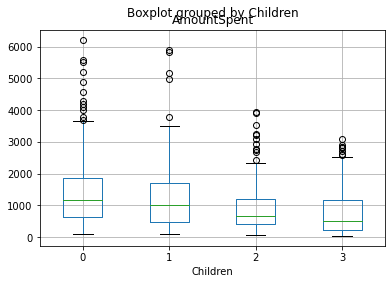

In [15]:
data.boxplot(by="Children",column='AmountSpent')

In [16]:
def combine_kids(x):
    if x==2 or x==3:
        res = "2-3"
    else:
        res = str(x)
    return res

In [19]:
data['Children_N']=data['Children'].map(combine_kids)

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='Catalogs'>

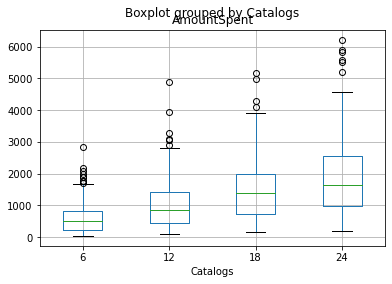

In [20]:
data.boxplot(by="Catalogs",column='AmountSpent')

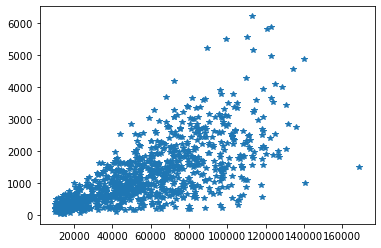

In [21]:
plt.plot(data['Salary'],data['AmountSpent'],"*")

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='History'>

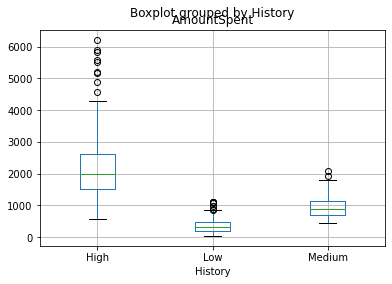

In [23]:
data.boxplot(by="History",column='AmountSpent')

In [24]:
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
Age_N            0
Children_N       0
dtype: int64

<AxesSubplot:title={'center':'AmountSpent'}, xlabel='History'>

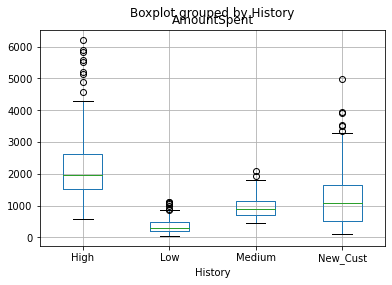

In [26]:
data.boxplot(by="History",column='AmountSpent')

In [27]:
rel_cols = ['Age_N',"Gender","OwnHome","Married","Location",
           "Salary","Children_N","AmountSpent","Catalogs","History"]

In [28]:
data_new = data[rel_cols]

In [36]:
data_new['Catalogs']=data_new['Catalogs'].astype('str')

/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_40522/1357420123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Catalogs']=data_new['Catalogs'].astype('str')


In [37]:
data_new.isnull().sum()

Age_N          0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children_N     0
AmountSpent    0
Catalogs       0
History        0
dtype: int64

In [38]:
train = data_new.sample(frac=0.70,random_state=200)

In [39]:
test = data_new.drop(train.index)

In [40]:
test.head(2)

,Age_N,Gender,OwnHome,Married,Location,Salary,Children_N,AmountSpent,Catalogs,History
0,Middle-Old,Female,Own,Single,Far,47500,0,755,6,High
2,Young,Female,Rent,Single,Close,13500,0,296,18,Low


In [41]:
train.head(2)

,Age_N,Gender,OwnHome,Married,Location,Salary,Children_N,AmountSpent,Catalogs,History
674,Middle-Old,Female,Own,Married,Close,85500,2-3,895,18,Medium
233,Middle-Old,Female,Own,Married,Close,74400,0,2479,18,High


In [42]:
import statsmodels.formula.api as smf

In [45]:
formula = '''AmountSpent~C(Age_N)+C(Gender)+C(OwnHome)+C(Location)
            +C(Children_N)+C(History)+C(Married)+C(Catalogs)+Salary'''

In [46]:
model1 = smf.ols(formula,data=train).fit()

In [47]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.48e-198
Time:                        10:55:34   Log-Likelihood:                -5317.9
No. Observations:                 700   AIC:                         1.067e+04
Df Residuals:                     685   BIC:                         1.073e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                295

In [48]:
train.head()

,Age_N,Gender,OwnHome,Married,Location,Salary,Children_N,AmountSpent,Catalogs,History
674,Middle-Old,Female,Own,Married,Close,85500,2-3,895,18,Medium
233,Middle-Old,Female,Own,Married,Close,74400,0,2479,18,High
739,Middle-Old,Male,Rent,Single,Close,45900,0,716,12,Medium
865,Middle-Old,Male,Own,Married,Close,96100,0,1588,6,High
523,Middle-Old,Female,Rent,Married,Far,72200,0,3069,24,High


In [49]:
def create_hist_low(x):
    if x=="Low":
        return 1
    else:
        return 0
def create_hist_med(x):
    if x=="Medium":
        return 1
    else:
        return 0
train['Hist_low'] = train['History'].map(create_hist_low)
test['Hist_low'] = test['History'].map(create_hist_low) 
train['Hist_med'] = train['History'].map(create_hist_med)
test['Hist_med'] = test['History'].map(create_hist_med)

In [51]:
train.head(2)

,Age_N,Gender,OwnHome,Married,Location,Salary,Children_N,AmountSpent,Catalogs,History,Hist_low,Hist_med
674,Middle-Old,Female,Own,Married,Close,85500,2-3,895,18,Medium,0,1
233,Middle-Old,Female,Own,Married,Close,74400,0,2479,18,High,0,0


In [56]:
formula1 = '''AmountSpent~C(Location)+C(Children_N)+Hist_low+Hist_med+C(Catalogs)+Salary'''
model2 = smf.ols(formula1,data=train).fit()

In [57]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     234.6
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.01e-203
Time:                        11:08:32   Log-Likelihood:                -5319.6
No. Observations:                 700   AIC:                         1.066e+04
Df Residuals:                     690   BIC:                         1.070e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              248.4500 

In [60]:
resid = (train['AmountSpent']-model1.fittedvalues)

<AxesSubplot:ylabel='Frequency'>

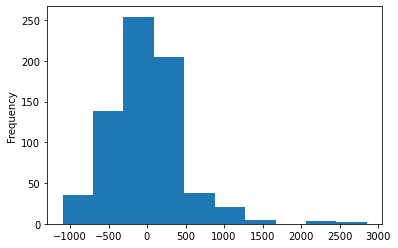

In [62]:
resid.plot(kind='hist')

In [63]:
resid.mean()

-6.4435701980463425e-09

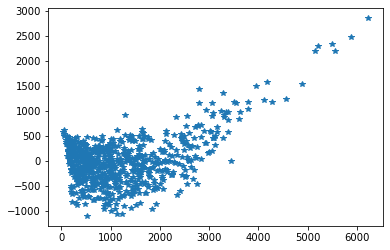

In [68]:
##check non-constant variation
plt.plot(train['AmountSpent'],resid,"*")

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
from patsy import dmatrices

In [72]:
y,X=dmatrices(formula1,data=train,return_type='dataframe')

In [75]:
formula1

'AmountSpent~C(Location)+C(Children_N)+Hist_low+Hist_med+C(Catalogs)+Salary'

In [79]:
variance_inflation_factor(X,3)

1.3312794657519549

In [85]:
vif = []
for i,col in enumerate(X.columns):
    vif.append((variance_inflation_factor(X,i),col))

In [86]:
vif

[(12.287004024076221, 'Intercept'),
 (1.0598589483597727, 'C(Location)[T.Far]'),
 (1.180378796330559, 'C(Children_N)[T.1]'),
 (1.3312794657519549, 'C(Children_N)[T.2-3]'),
 (1.4198348159728713, 'C(Catalogs)[T.18]'),
 (1.4390295583494832, 'C(Catalogs)[T.24]'),
 (1.4424521511797805, 'C(Catalogs)[T.6]'),
 (1.6490514369199452, 'Hist_low'),
 (1.1854405148909442, 'Hist_med'),
 (1.353359345889976, 'Salary')]

In [88]:
import numpy as np
formula2 = '''np.sqrt(AmountSpent)~C(Location)+C(Children_N)+Hist_low+Hist_med+C(Catalogs)+Salary'''
model2 = smf.ols(formula2,data=train).fit()

In [89]:
print(model2.summary())

                             OLS Regression Results                             
Dep. Variable:     np.sqrt(AmountSpent)   R-squared:                       0.836
Model:                              OLS   Adj. R-squared:                  0.834
Method:                   Least Squares   F-statistic:                     391.3
Date:                  Tue, 28 Jun 2022   Prob (F-statistic):          3.26e-264
Time:                          12:07:03   Log-Likelihood:                -2165.9
No. Observations:                   700   AIC:                             4352.
Df Residuals:                       690   BIC:                             4397.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

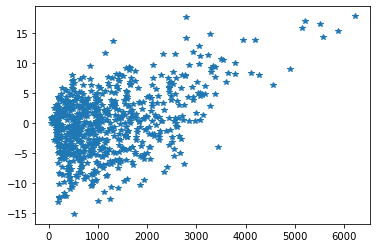

In [92]:
plt.plot(train['AmountSpent'],model2.resid,"*")

(array([  8.,  31.,  72., 135., 182., 149.,  75.,  29.,  12.,   7.]),
 array([-15.10177046, -11.81732778,  -8.5328851 ,  -5.24844242,
         -1.96399974,   1.32044294,   4.60488562,   7.8893283 ,
         11.17377098,  14.45821366,  17.74265634]),
 <BarContainer object of 10 artists>)

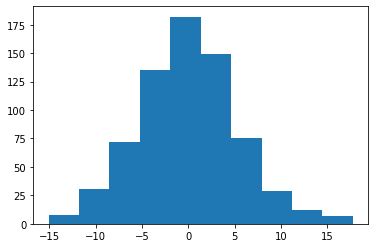

In [93]:
plt.hist(model2.resid)

In [94]:
model2.resid.mean()

1.2841682511017488e-10

In [95]:
url = "https://raw.githubusercontent.com/Gunnvant/corp_trainings/main/ola_electric/predictive_modelling/data/dataTrain_carListings.csv"
cars = pd.read_csv(url)

In [96]:
cars.shape

(500000, 6)

In [97]:
cars.head(2)

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe


In [98]:
len(cars['Make'].unique())

38

In [100]:
len(cars['Model'].unique())

525

In [101]:
cars.groupby('Make')['Price'].mean()

Make
Acura            21403.549498
Audi             19640.258929
BMW              25272.708661
Bentley          57455.095890
Buick            21220.334312
Cadillac         25568.179727
Chevrolet        23373.090960
Chrysler         16707.204262
Dodge            18074.691991
FIAT              9060.147929
Ford             22550.601028
Freightliner     26209.142857
GMC              28546.075338
Honda            17025.912871
Hyundai          14758.422306
INFINITI         16492.736426
Jaguar           19547.286730
Jeep             23378.251965
Kia              15913.867007
Land             36232.099500
Lexus            25861.963158
Lincoln          22906.473247
MINI             15213.863311
Mazda            14098.436653
Mercedes-Benz    30087.658629
Mercury           7767.018462
Mitsubishi       13494.956254
Nissan           16254.156744
Pontiac           7160.559194
Porsche          34534.385000
Ram              31420.468584
Scion             9556.065000
Subaru           19163.805154
Suzuk

In [103]:
cars['price_qtr']=pd.qcut(cars['Price'],4)

In [104]:
cars.head(2)

,Price,Year,Mileage,State,Make,Model,price_qtr
0,21490,2014,31909,MD,Nissan,MuranoAWD,"(18450.0, 26998.0]"
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,"(18450.0, 26998.0]"


In [105]:
cars.groupby(['Make','price_qtr']).agg({'Make':'count'})

Make
Make       price_qtr                
Acura      (5000.999, 13499.0]   808
           (13499.0, 18450.0]    532
           (18450.0, 26998.0]    654
           (26998.0, 79999.0]    996
Audi       (5000.999, 13499.0]   653
...                              ...
Volkswagen (26998.0, 79999.0]    147
Volvo      (5000.999, 13499.0]   473
           (13499.0, 18450.0]    306
           (18450.0, 26998.0]    621
           (26998.0, 79999.0]    759

[152 rows x 1 columns]